In [1]:
"""
  This part of the code is importing all the necessary libraries and modules for building a Convolutional Neural Network (CNN) using TensorFlow and Keras. It includes libraries for numerical computations, plotting, building the neural network model, defining the layers of the model, optimizing the model, and providing a callback for early stopping during training. This sets up the environment for implementing a CNN for tasks such as image classification.
"""
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model  # Importing Model from tensorflow.keras.models. A Model is like a Sequential, but more general, it can be used to create more complex models.

from tensorflow.keras.datasets import cifar10  # Importing the CIFAR-10 small images classification dataset. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class.

from tensorflow.keras.utils import to_categorical  # Importing to_categorical from tensorflow.keras.utils. This utility function converts a class vector (integers) to binary class matrix.

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Input, Flatten, Rescaling, concatenate  # Importing various layers from tensorflow.keras.layers. These are the building blocks for constructing a neural network model.

from tensorflow.keras.optimizers import Adam  # Importing Adam optimizer from tensorflow.keras.optimizers. Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based on training data.

from tensorflow.keras.callbacks import EarlyStopping  # Importing EarlyStopping from tensorflow.keras.callbacks. EarlyStopping is used in Keras to stop training when a monitored metric has stopped improving.


In [2]:
"""
  This part of the code is loading and preprocessing the CIFAR-10 dataset. The dataset is divided into training data and testing data. The images are converted to float32 and their pixel values are scaled to the range [0, 1]. The labels are converted to one-hot vectors. This prepares the data for training a neural network model.
"""
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # This line is loading the CIFAR-10 dataset. The dataset is divided into training data (x_train, y_train) and testing data (x_test, y_test).

x_train = x_train.astype('float32') / 255  # This line is converting the training images to float32 and scaling the pixel values to the range [0, 1] by dividing by 255 (since pixel values are originally in the range [0, 255]).

x_test = x_test.astype('float32') / 255  # This line is converting the testing images to float32 and scaling the pixel values to the range [0, 1] by dividing by 255.

y_train = to_categorical(y_train, 10)  # This line is converting the training labels to one-hot vectors. Each label is a number from 0 to 9, and this line converts each number to a 10-dimensional vector where the i-th element is 1 if the label is i and 0 otherwise.

y_test = to_categorical(y_test, 10)  # This line is converting the testing labels to one-hot vectors in the same way as the training labels.

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
"""
  This part of the code is defining and compiling a convolutional neural network for multi-class image classification using the functional API in Keras. The network consists of an Inception module, a flatten layer, and a dense layer. The Inception module is implemented as three “towers”: a 1x1 convolution followed by a 3x3 convolution (tower_1), a 1x1 convolution followed by a 5x5 convolution (tower_2), and a 3x3 max pooling followed by a 1x1 convolution (tower_3). The outputs of these towers are concatenated to form the output of the Inception module. The final layer uses a softmax activation function for multi-class classification. The model is compiled with the Adam optimizer and the categorical cross-entropy loss function. The accuracy of the model will be monitored during training. The structure of the model is then printed.
"""
input_img = Input(shape=(32, 32, 3))  # This line is defining the input layer of the model. The shape of the input is (32, 32, 3), which means the model expects input images of size 32x32 with 3 channels (RGB).

tower_1 = Conv2D(16, (1, 1), padding='same', activation='relu')(input_img)  # This line is adding a 2D convolution layer to the model. This layer has 16 filters, each of size 1x1, and uses the ReLU activation function.
tower_1 = Conv2D(8, (3, 3), padding='same', activation='relu')(tower_1)  # This line is adding another 2D convolution layer to the model. This layer has 8 filters, each of size 3x3, and uses the ReLU activation function.

tower_2 = Conv2D(16, (1, 1), padding='same', activation='relu')(input_img)  # This line is adding a 2D convolution layer to the model. This layer has 16 filters, each of size 1x1, and uses the ReLU activation function.
tower_2 = Conv2D(8, (5, 5), padding='same', activation='relu')(tower_2)  # This line is adding another 2D convolution layer to the model. This layer has 8 filters, each of size 5x5, and uses the ReLU activation function.

tower_3 = MaxPool2D((3, 3), strides=(1, 1), padding='same')(input_img)  # This line is adding a 2D max pooling layer to the model. The pooling operation is applied over a 3x3 window.
tower_3 = Conv2D(16, (1, 1), padding='same', activation='relu')(tower_3)  # This line is adding a 2D convolution layer to the model. This layer has 16 filters, each of size 1x1, and uses the ReLU activation function.

output = concatenate([tower_1, tower_2, tower_3], axis=-1)  # This line is concatenating the outputs of the three towers along the channel dimension. This is the output of the Inception module.

output = Flatten()(output)  # This line is adding a Flatten layer to the model. This layer flattens the multi-dimensional input into a one-dimensional tensor, which can be used by fully connected Dense layers.

out    = Dense(10, activation='softmax')(output)  # This line is adding a Dense layer to the model. This layer has 10 units and uses the softmax activation function, making it suitable for multi-class classification.

model = Model(inputs = input_img, outputs = out)  # This line is creating the model. The Model class is used to define the model, with the input layer and output layer as arguments.

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # This line is compiling the model. It sets the optimizer to Adam, the loss function to categorical cross-entropy (which is suitable for multi-class classification), and the metric to accuracy.

model.summary()  # This line is printing a summary of the model, including the number of parameters and the output shape of each layer.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 32, 32, 16)           64        ['input_2[0][0]']             
                                                                                                  
 conv2d_6 (Conv2D)           (None, 32, 32, 16)           64        ['input_2[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 32, 32, 3)            0         ['input_2[0][0]']             
 D)                                                                                           

In [6]:
"""
  Training the model using a batch size 64 and for 15 epochs
"""
history = model.fit(x_train, y_train, batch_size=64, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
782/782 [==============================] - 18s 9ms/step - loss: 1.5196 - accuracy: 0.4654 - val_loss: 1.2906 - val_accuracy: 0.5395
Epoch 2/15
782/782 [==============================] - 6s 7ms/step - loss: 1.1844 - accuracy: 0.5846 - val_loss: 1.2340 - val_accuracy: 0.5649
Epoch 3/15
782/782 [==============================] - 5s 7ms/step - loss: 1.0828 - accuracy: 0.6232 - val_loss: 1.1898 - val_accuracy: 0.5839
Epoch 4/15
782/782 [==============================] - 6s 7ms/step - loss: 0.9899 - accuracy: 0.6574 - val_loss: 1.1550 - val_accuracy: 0.5976
Epoch 5/15
782/782 [==============================] - 6s 7ms/step - loss: 0.8982 - accuracy: 0.6880 - val_loss: 1.1672 - val_accuracy: 0.6039
Epoch 6/15
782/782 [==============================] - 6s 7ms/step - loss: 0.8282 - accuracy: 0.7138 - val_loss: 1.1590 - val_accuracy: 0.6095
Epoch 7/15
782/782 [==============================] - 6s 7ms/step - loss: 0.7636 - accuracy: 0.7356 - val_loss: 1.2056 - val_accuracy: 0.6028
Epoch

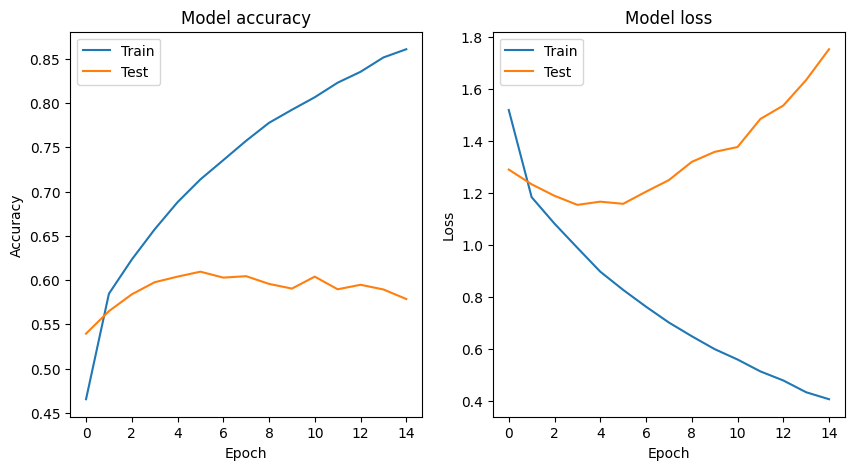

In [8]:
"""
  This part of the code is visualizing the training and validation accuracy and loss of the model. It creates a figure with two subplots: one for accuracy and one for loss. In each subplot, the training values and validation values are plotted against the epoch number. The subplots are labeled and a legend is added for clarity. Finally, the figure with the subplots is displayed.
"""
history_dict = history.history  # This line is getting the history of the model training, which includes the training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

plt.figure(figsize=(10,5))  # This line is creating a new figure with a specified size.

plt.subplot(1, 2, 1)  # This line is creating the first subplot in a 1x2 grid of subplots.
plt.plot(history_dict['accuracy'])  # This line is plotting the training accuracy values.
plt.plot(history_dict['val_accuracy'])  # This line is plotting the validation accuracy values.
plt.title('Model accuracy')  # This line is setting the title of the subplot to 'Model accuracy'.
plt.ylabel('Accuracy')  # This line is setting the label of the y-axis to 'Accuracy'.
plt.xlabel('Epoch')  # This line is setting the label of the x-axis to 'Epoch'.
plt.legend(['Train', 'Test'], loc='upper left')  # This line is adding a legend to the subplot.

plt.subplot(1, 2, 2)  # This line is creating the second subplot in a 1x2 grid of subplots.
plt.plot(history_dict['loss'])  # This line is plotting the training loss values.
plt.plot(history_dict['val_loss'])  # This line is plotting the validation loss values.
plt.title('Model loss')  # This line is setting the title of the subplot to 'Model loss'.
plt.ylabel('Loss')  # This line is setting the label of the y-axis to 'Loss'.
plt.xlabel('Epoch')  # This line is setting the label of the x-axis to 'Epoch'.
plt.legend(['Train', 'Test'], loc='upper left')  # This line is adding a legend to the subplot.

plt.show()  # This line is displaying the figure with the subplots.

In [7]:
# testing model on train dataset
train_loss, train_accuracy = model.evaluate(x_train, y_train)

print(f'Train loss: {train_loss}')
print(f'Train accuracy: {train_accuracy}')

1563/1563 [==============================] - 7s 4ms/step - loss: 0.3376 - accuracy: 0.8889
Train loss: 0.33761128783226013
Train accuracy: 0.8888800144195557
